# Activity 1.3 : Regularization

Name: Joshua Baconawa

Section: CPE32S8

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

Check the actual image

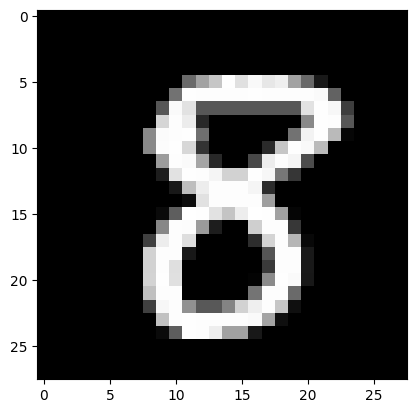

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5042 - accuracy: 0.8501 - val_loss: 0.2130 - val_accuracy: 0.9338
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2529 - accuracy: 0.9258 - val_loss: 0.1601 - val_accuracy: 0.9496
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2031 - accuracy: 0.9405 - val_loss: 0.1246 - val_accuracy: 0.9619
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1764 - accuracy: 0.9482 - val_loss: 0.1213 - val_accuracy: 0.9644
Epoch 5/30
469/469 [==============================] - 3s 5ms/step - loss: 0.1588 - accuracy: 0.9532 - val_loss: 0.1113 - val_accuracy: 0.9650
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1452 - accuracy: 0.9564 - val_loss: 0.1034 - val_accuracy: 0.9689
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1375 - accuracy: 0.9590 - val_loss: 0.1060 - val_accuracy: 0.9697
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10089397430419922
Test accuracy: 0.9764999747276306


Interpret the result

The evaluation of the model's test loss resulted in 0.105455% as for the test accuracy, it resulted 0.975%. This tells that the model performs quite well in the test data having a low loss and high accuracy.

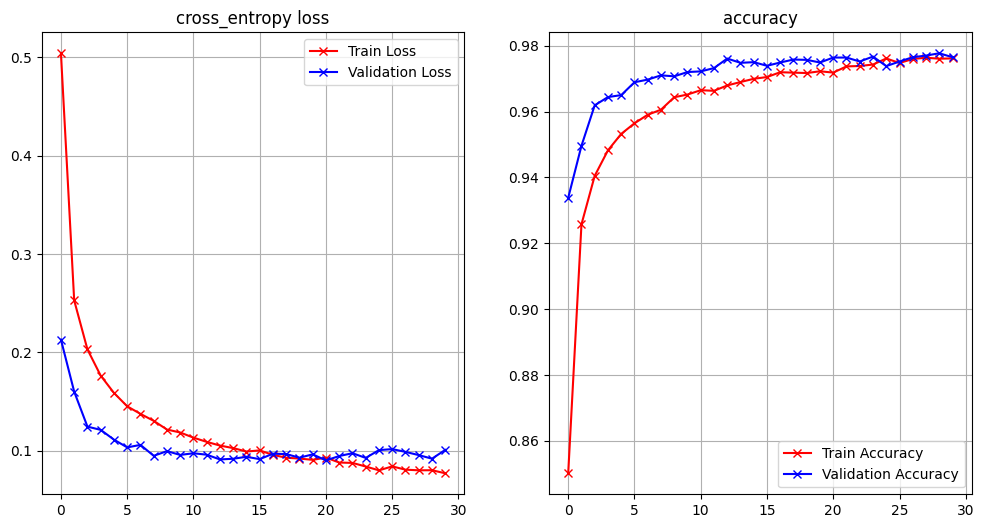

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

In the cross_entropy loss, we can see that the validation loss is somehow overfitting as for the train loss, it did great for continuing on having less loss at around 15 epochs. As for the accuracy, the training may have had a bit of catching up but did well at around 15 epochs as well while the validation accuracy all in all is looking fantastic with no problems having a high accuracy whatsoever.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
# 1. Two hidden layers.
# 2. First hidden layer of size 400 and second of size 300
# 3. Dropout of .4 at each layer

model_1 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 4. How many parameters does your model have? How does it compare with the
#    previous model?
#
#    It has 437,310 parameters. It has a larger size compared with the
#    previous model which is good because it will learn more considering there
#    are a lot of hidden layers but can be a downside as well because it has a
#    tendency to overfit the model.

In [ ]:
# 5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and
#    a batch size of 128

epochs = 20
learning_rate = .001
batch_size = 128

model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr=learning_rate), metrics=['accuracy'])

hist_1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                     verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.3267 - accuracy: 0.9007 - val_loss: 0.1225 - val_accuracy: 0.9604
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1500 - accuracy: 0.9549 - val_loss: 0.1084 - val_accuracy: 0.9657
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1164 - accuracy: 0.9649 - val_loss: 0.0751 - val_accuracy: 0.9765
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0982 - accuracy: 0.9701 - val_loss: 0.0766 - val_accuracy: 0.9766
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0889 - accuracy: 0.9736 - val_loss: 0.0703 - val_accuracy: 0.9795
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0785 - accuracy: 0.9765 - val_loss: 0.0682 - val_accuracy: 0.9815
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0724 - accuracy: 0.9788 - val_loss: 0.0763 - val_accuracy: 0.9796

In [ ]:
# 6. Use at least two regularization techniques and apply it to the new
#    model (model_2)

from keras import regularizers

model_2 = Sequential([
    Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01),
          input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    Dense(10, activation='softmax')])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               120300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 7. Train this model for your preferred epochs , learning rate, batch size
#    and optimizer

model_2.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])
epochs = 20
batch_size = 128

model_2.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])

hist_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                     verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 1.5879 - accuracy: 0.8626 - val_loss: 0.5785 - val_accuracy: 0.9213
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.6151 - accuracy: 0.9060 - val_loss: 0.5282 - val_accuracy: 0.9286
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.5698 - accuracy: 0.9144 - val_loss: 0.4808 - val_accuracy: 0.9375
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.5464 - accuracy: 0.9182 - val_loss: 0.4583 - val_accuracy: 0.9401
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.5290 - accuracy: 0.9212 - val_loss: 0.4646 - val_accuracy: 0.9445
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5142 - accuracy: 0.9230 - val_loss: 0.4455 - val_accuracy: 0.9426
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5073 - accuracy: 0.9259 - val_loss: 0.4390 - val_accuracy: 0.9432

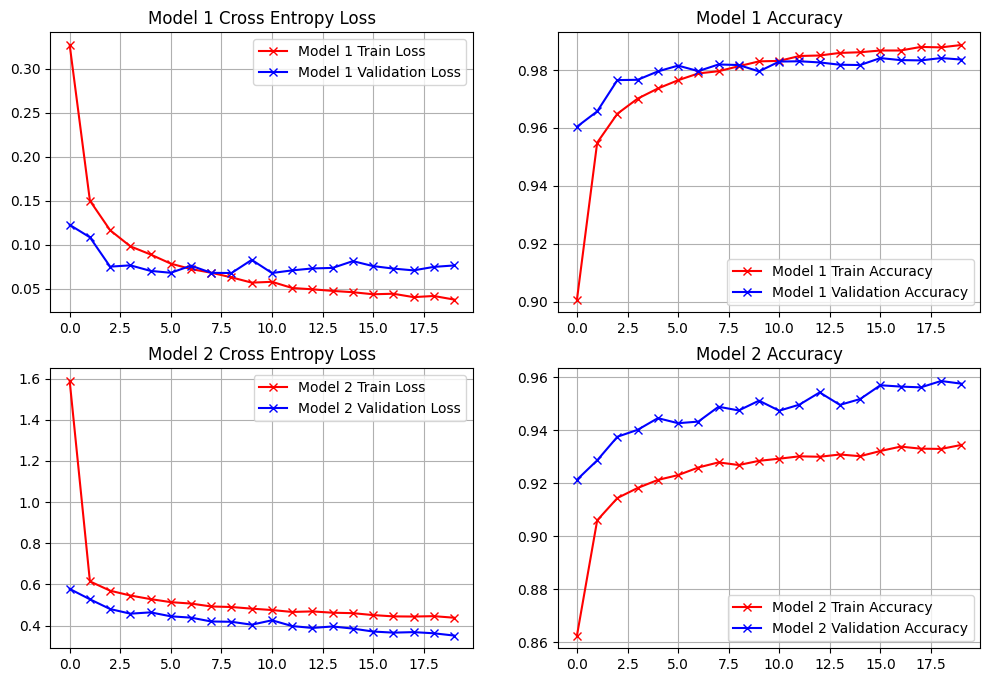

In [ ]:
# 8. Compare the accuracy and loss (training and validation) of model_1 and
#    model_2

def plot_loss_accuracy(hist_1, hist_2):
    fig = plt.figure(figsize=(12, 8))

    # model_1 Loss
    ax = fig.add_subplot(2, 2, 1)
    ax.plot(hist_1.history["loss"],'r-x', label="Model 1 Train Loss")
    ax.plot(hist_1.history["val_loss"],'b-x', label="Model 1 Validation Loss")
    ax.legend()
    ax.set_title('Model 1 Cross Entropy Loss')
    ax.grid(True)

    # model_1 Accuracy
    ax = fig.add_subplot(2, 2, 2)
    ax.plot(hist_1.history["accuracy"],'r-x', label="Model 1 Train Accuracy")
    ax.plot(hist_1.history["val_accuracy"],'b-x', label="Model 1 Validation Accuracy")
    ax.legend()
    ax.set_title('Model 1 Accuracy')
    ax.grid(True)

    # model_2 Loss
    ax = fig.add_subplot(2, 2, 3)
    ax.plot(hist_2.history["loss"],'r-x', label="Model 2 Train Loss")
    ax.plot(hist_2.history["val_loss"],'b-x', label="Model 2 Validation Loss")
    ax.legend()
    ax.set_title('Model 2 Cross Entropy Loss')
    ax.grid(True)

    # model_2 Accuracy
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(hist_2.history["accuracy"],'r-x', label="Model 2 Train Accuracy")
    ax.plot(hist_2.history["val_accuracy"],'b-x', label="Model 2 Validation Accuracy")
    ax.legend()
    ax.set_title('Model 2 Accuracy')
    ax.grid(True)

plot_loss_accuracy(hist_1, hist_2)

As we can see here, the entropy loss of model 1 is looking normal and that it could have been better looking at how normal the model is. The entropy loss of model 2 on the other hand is an exception and is pretty great. The accuracy of the model 1 is pretty good. Then, the accuracy of model 2 is looking pretty great as well. Now I know that using RMSprop instead of SGD as the optimizer of the model is much better. The 1st model is better.

#### Conclusion

In this activity, I used regularization for the models I built as well as the enterpretation of the result of it as well. Regularization techniques in neural networks are used to prevent overfitting, which occurs when a model learns to memorize the training data instead of generalizing well to unseen data and that it typically happens when a model becomes too complex relative to the amount of the training data. In the supplementary activity, the first model was pretty great and that the second model could have been better. Also, regularization techniques add penalties to the loss function, making the model to learn simpler patterns that are more likely to discover well.